In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
num_samples = 1000
num_sim = 100

In [3]:
mse_list = [0] # these store the values for different p (number of dimensions)
bias_list = [0]
var_list = [0]

In [4]:
for p in range(1,21): # run this from p = 1...20
    mse = []
    y_values = []
    
    for i in range(num_sim): # number of simulations per dimension
        xtrain = np.zeros([num_samples, p])
        origin = np.zeros(p)
        for j in range(num_samples): # create a data matrix of n samples with p dimensions
            xtrain[j] = np.random.uniform(-0.5, 0.5, p) # every element of the vector ~ U[0,1]
        distances = np.linalg.norm(xtrain-origin, axis=1) # find distances of each from the origin
        closest = xtrain[np.argmin(distances)] # index of the minimum distance point
        sq_norm = 0
        for k in range(0,p//2): # compute the value of y using just the first p/2 elements
            sq_norm += closest[k]**2
        y_closest = math.exp(-8*math.sqrt(sq_norm)) 
        y_actual = 1
        mse.append((y_actual - y_closest)**2) # calculate mse
        y_values.append(y_closest)
        
    avg_mse = sum(mse)/len(mse) # average mse over all simulations for a given dimension
    var_y = np.var(y_values) # variance
    sq_bias = avg_mse - var_y # squared bias
    mse_list.append(avg_mse)
    var_list.append(var_y)
    bias_list.append(sq_bias)

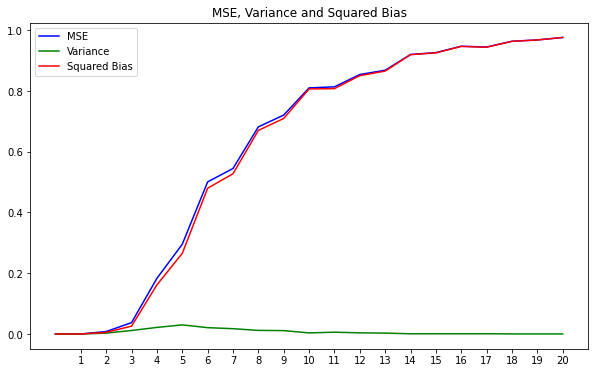

In [5]:
plt.plot(mse_list, color='blue', label='MSE');
plt.plot(var_list, color='green', label='Variance');
plt.plot(bias_list, color='red', label='Squared Bias');
plt.title("MSE, Variance and Squared Bias");
plt.xticks(range(1,21))
plt.legend();
fig = plt.gcf()
fig.set_size_inches(10, 6);

In [18]:
mse_list2 = [0]
bias_list2 = [0]
var_list2 = [0]

In [19]:
# this follows the exact same procedure as above with a different data generating function
for p in range(1,21):
    mse = []
    y_values = []
    
    for i in range(num_sim):
        xtrain = np.zeros([num_samples, p])
        origin = np.zeros(p)
        for j in range(num_samples):
            xtrain[j] = np.random.uniform(-0.5, 0.5, p)
        distances = np.linalg.norm(xtrain-origin, axis=1)
        closest = xtrain[np.argmin(distances)]
        norm = 0
        for k in range(0,p//2):
            norm += closest[k]
        y_closest = math.exp((norm)) # new data generating function
        y_actual = 1
        mse.append((y_actual - y_closest)**2)
        y_values.append(y_closest)
        
    avg_mse = sum(mse)/len(mse)
    var_y = np.var(y_values)
    sq_bias = avg_mse - var_y
    mse_list2.append(avg_mse)
    var_list2.append(var_y)
    bias_list2.append(sq_bias)

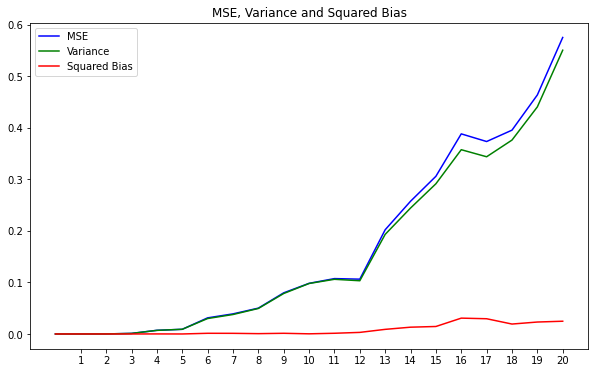

In [20]:
plt.plot(mse_list2, color='blue', label='MSE');
plt.plot(var_list2, color='green', label='Variance');
plt.plot(bias_list2, color='red', label='Squared Bias');
plt.title("MSE, Variance and Squared Bias");
plt.xticks(range(1,21))
plt.legend();
fig = plt.gcf()
fig.set_size_inches(10, 6);